In [1]:
!curl http://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   178  100   178    0     0   1028      0 --:--:-- --:--:-- --:--:--  1028
bash: line 1: html: No such file or directory
bash: line 2: syntax error near unexpected token `<'
'


In [2]:
#!/bin/bash
!if [ ! -d course-v3 ]; then
!        pip install pillow==4.1.1 --upgrade
!        pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html --upgrade
!
!        sed -n -e '/^tmpfs \/dev\/shm tmpfs defaults,size=/!p' -e '$atmpfs \/dev\/shm tmpfs defaults,size=1g 0 0' -i /etc/fstab
!        mount -o remount /dev/shm

!        mkdir -p /root/.torch/models
!        mkdir -p /root/.fastai/data
!        ln -s /root/.torch/models /content
!        ln -s /root/.fastai/data /content
!        rm -rf /content/sample_data/
!        git clone https://github.com/fastai/course-v3
!fi

!pip install fastai --upgrade
!cd course-v3
!git pull

/bin/bash: -c: line 1: syntax error: unexpected end of file
    100% |████████████████████████████████| 5.7MB 5.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 578.2MB 26kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x618ea000 @  0x7fa14b8af2a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
Cloning into 'course-v3'...
remote: Enumerating objects: 1991, done.
remote: Total 1991 (delta 0), reused 0 (delta 0), pack-reused 1991
Receiving objects: 100% (1991/1991), 39.34 MiB | 32.20 MiB/s, done.
Resolving deltas: 100% (1095/1095), done.
/bin/bash: -c: line 0: syntax er

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
import PIL
from matplotlib.pyplot import imshow

In [152]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
path = Path('/gdrive/My Drive/emotion')

In [5]:
!curl --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:63.0) Gecko/20100101 Firefox/63.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3364/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1541336554&Signature=XF81W9YNj6d0UGXqDLsikzIU%2BniUjR2jF5o5JP7bDObkCNg55A%2B03sTtgZwuyIV%2FrMb2rcQVW1vHSJX2geNQRwH0bXw1AcVkjmCQMCGKAvqJCU4cDWZgMRuoUrIUgwIivplr0k1En2xjvtgZSGx72FkYMRDJYlp0kR6RVmZBMirjQa1UeQDEU65p2FH0VE3rC0EDDQUuvop85ghmFwGvrD%2BITd3TA847MB30hg0ypua%2BCvW4spTnjFgSK5sPhJitrsHU8wIvqp3WiKPCG4eX6WgBpUZjeahAfrMgLGLTcOyA%2F5DkVnhaKOooEN0FyJTJwX9I6KUYd8qKsHBE8NB31w%3D%3D' --output 'all.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91.9M  100 91.9M    0     0  57.1M      0  0:00:01  0:00:01 --:--:-- 57.1M


In [6]:
!unzip all.zip

Archive:  all.zip
  inflating: fer2013.tar.gz          
  inflating: example_submission.csv  


In [0]:
!tar xzf fer2013.tar.gz

In [8]:
!ls fer2013

fer2013.bib  fer2013.csv  README


In [10]:
raw_df = pd.read_csv('fer2013/fer2013.csv'); raw_df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [11]:
raw_df.groupby('Usage').count()

,emotion,pixels
Usage,,
PrivateTest,3589,3589
PublicTest,3589,3589
Training,28709,28709


Convert the string into an array of integers

In [0]:
raw_df['pixels'] = raw_df['pixels'].apply(lambda x: [int(i) for i in x.split(" ")])

In [0]:
train_df = raw_df[raw_df['Usage']=='Training']
valid_df = raw_df[raw_df['Usage']=='PublicTest']
test_df = raw_df[raw_df['Usage']=='PrivateTest']

In [15]:
train_df.shape, valid_df.shape, test_df.shape

((28709, 3), (3589, 3), (3589, 3))

Show one image

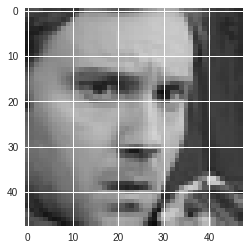

In [47]:
data = train_df['pixels'][0]
img = PIL.Image.new('P', (48, 48)); img.putdata(data) #Image.fromarray(train_df['pixels'][0])
#img.show()
imshow(img)

In [0]:
class MemImageDataset(ImageDataset):
    def __init__(self, X, y, classes):
        super().__init__(classes)
        self.x = X
        self.y = y
        self.loss_func = F.cross_entropy
        
    def _get_y(self,i):
        return self.y[i]
    
    def _get_x(self,i):
        img = PIL.Image.new('P', (48, 48))
        img.putdata(self.x[i])
        img = img.convert('RGB')
        return Image(pil2tensor(img).float().div_(255))
    
    def __len__(self): return len(self.x)
    
    @classmethod
    def from_array(cls, X, labels, classes):
        return [cls(*a, classes=classes) for a in random_split(valid_pct, fns, labels)]
        

In [0]:
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
train_ds = MemImageDataset(train_df['pixels'].values, train_df['emotion'].values, classes)
valid_ds = MemImageDataset(valid_df['pixels'].values, valid_df['emotion'].values, classes)
test_ds = MemImageDataset(test_df['pixels'].values, test_df['emotion'].values, classes)

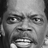

In [134]:
train_ds._get_x(10)

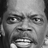

In [135]:
train_ds.__getitem__(10)[0]

In [136]:
train_ds.__getitem__(10)[1]

0

### Training

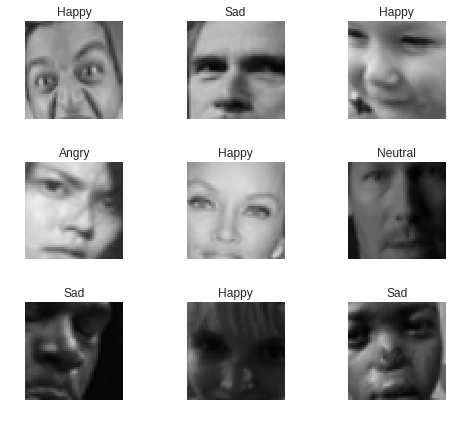

In [165]:
data = ImageDataBunch.create(train_ds, valid_ds, test_ds, path=path, ds_tfms=get_transforms(), size=48, bs=64)
data = data.normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [166]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
 7,
 28709,
 3589)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [168]:
learn.fit_one_cycle(4)

Total time: 06:14
epoch  train_loss  valid_loss  error_rate
1      1.718511    1.567199    0.612148    (01:33)
2      1.545089    1.412607    0.547506    (01:33)
3      1.465535    1.328608    0.509613    (01:34)
4      1.412857    1.317932    0.510170    (01:33)



In [0]:
interp = ClassificationInterpretation.from_learner(learn)

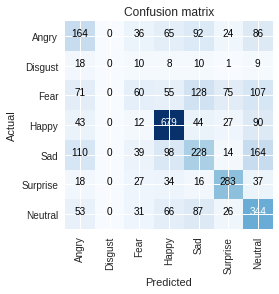

In [170]:
interp.plot_confusion_matrix()

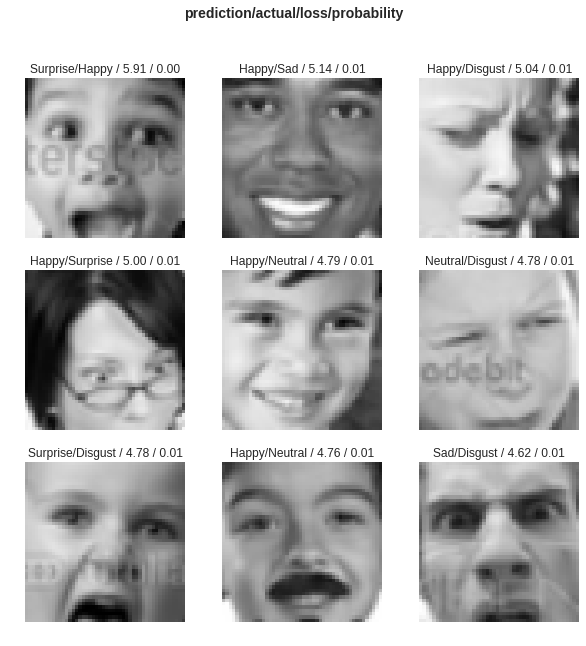

In [171]:
interp.plot_top_losses(9, figsize=(10,10))

In [0]:
learn.unfreeze()

In [173]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


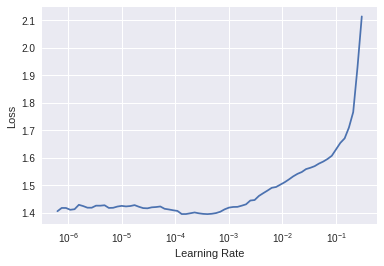

In [174]:
learn.recorder.plot()

In [175]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4))

Total time: 17:44
epoch  train_loss  valid_loss  error_rate
1      1.392744    1.281357    0.490387    (01:45)
2      1.361382    1.233351    0.465311    (01:46)
3      1.282956    1.189956    0.453608    (01:45)
4      1.261251    1.137721    0.429925    (01:46)
5      1.201049    1.118314    0.424909    (01:47)
6      1.177099    1.093673    0.409028    (01:47)
7      1.145489    1.071634    0.402062    (01:47)
8      1.127484    1.062237    0.398440    (01:47)
9      1.107308    1.059711    0.399554    (01:46)
10     1.099827    1.058253    0.396489    (01:46)



In [0]:
learn.save('stage-2')

### Prediction

In [0]:
data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=48).normalize(imagenet_stats)
learner = create_cnn(data, models.resnet34)
learner.load('stage-2')

In [178]:
learner.predict(train_ds._get_x(10))

('Angry',
 tensor(0),
 tensor([7.7620, 0.6239, 2.4098, 0.4851, 1.5716, 0.1141, 0.7207]))